In [ ]:
import os
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns

tfk = tf.keras

In [ ]:
# Load the Model
model = tf.keras.models.load_model('Output/Model.hdf5')
# Directory of the Data
test_dir = './GitHub/LeafClassification-AN2DL/Data/test'

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
test_dir = 'test'
test_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_gen = test_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(256,256),
                                              color_mode='rgb',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              shuffle=False
                                             )

Found 60343 images belonging to 14 classes.


In [ ]:
# Compute the Accuracy on the Test Set
model_metrics = model.evaluate(test_gen, return_dict=True)
print(model_metrics)

1886/1886 [==============================] - 1004s 525ms/step - loss: 0.0589 - accuracy: 0.9844
{'loss': 0.058899033814668655, 'accuracy': 0.984438955783844}


In [ ]:
# Build the Confusion Matrix
predictions = model.predict(test_gen)
cm = confusion_matrix(test_gen.labels, np.argmax(predictions, axis=-1), normalize = "pred")

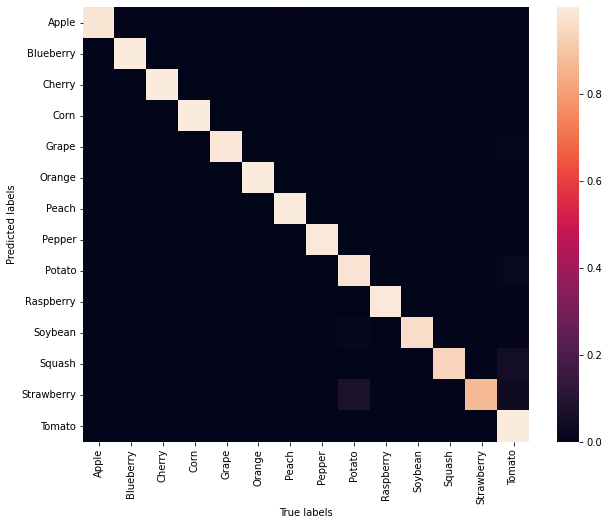

In [ ]:
# Print the Confusion Matrix
labels = ["Apple","Blueberry","Cherry","Corn","Grape","Orange","Peach","Pepper","Potato","Raspberry","Soybean","Squash","Strawberry","Tomato"]
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, xticklabels= labels, yticklabels=list(labels))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()